# Tutorial 7: Phase stability: energy difference of bcc and fcc Lithium 

## Import libraries

In [2]:
import siman #program package to manage DFT calculations https://github.com/dimonaks/siman
from siman.calc_manage import smart_structure_read, get_structure_from_matproj
from siman.calc_manage import add, res
from siman.set_functions import read_vasp_sets
from siman.database import write_database, read_database
from siman.header import db
read_database() # read saved database if available
import project_sets # should be after read_database
varset = read_vasp_sets(project_sets.user_vasp_sets, override_global = 0) #read user sets


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# убрать одну из потимизаций bcc-fcc, которые были сделаны в 5-6 туториалах 

/home/t.goryacheva/simanrc.py was read


## Get POSCAR from Materials Project

In [2]:
Li_fcc = get_structure_from_matproj(mat_proj_id = 'mp-51') # fcc phase with Fm-3m symmetry group
Li_fcc.printme()
Li_fcc.sg() #show spacegroup

Structure mp-51 downloaded from materialsproject.org
 File mp-51.POSCAR was written 

Full Formula (Li1)
Reduced Formula: Li
abc   :   3.054624   3.054624   3.054624
angles:  60.000000  60.000000  60.000000
Sites (1)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Li      0    0    0
('Fm-3m', 225)


('Fm-3m', 225)

In [3]:
Li_bcc = get_structure_from_matproj(mat_proj_id = 'mp-135') # bcc phase with Im-3m symmetry group
Li_bcc.printme()
Li_bcc.sg() #show spacegroup

Structure mp-135 downloaded from materialsproject.org
 File mp-135.POSCAR was written 

Full Formula (Li1)
Reduced Formula: Li
abc   :   2.967711   2.967711   2.967711
angles: 109.471221 109.471221 109.471221
Sites (1)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Li      0    0    0
('Im-3m', 229)


('Im-3m', 229)

## Optimize fcc

In [4]:
add('Li_fcc', 'ion_relax_opt', 1, input_st = Li_fcc, it_folder = 'Li/',  
    calc_method = 'uniform_scale', scale_region = (-5, 5),  n_scale_images = 5, run = 0)

-- Attention!, cluster None is not found, using default raz 

-- add_loop_scale(): Preparing   scale  calculation ...  

-- File xyz/mp-51_used_for_scaling.xyz was written 

-- Scale_region is (-5, 5) 

-- Scales are [-5.  -2.5  0.   2.5  5. ] 

-- Warning! File ./Li//Li_fcc.su/Li_fcc.su.auto_created_scaled_image.1.geo was replaced 

-- File xyz/Li_fcc.su.1.xyz was written 

-- Warning! File ./Li//Li_fcc.su/Li_fcc.su.auto_created_scaled_image.2.geo was replaced 

-- File xyz/Li_fcc.su.2.xyz was written 

-- Warning! File ./Li//Li_fcc.su/Li_fcc.su.auto_created_scaled_image.3.geo was replaced 

-- File xyz/Li_fcc.su.3.xyz was written 

-- Warning! File ./Li//Li_fcc.su/Li_fcc.su.auto_created_scaled_image.4.geo was replaced 

-- File xyz/Li_fcc.su.4.xyz was written 

-- Warning! File ./Li//Li_fcc.su/Li_fcc.su.auto_created_scaled_image.5.geo was replaced 

-- File xyz/Li_fcc.su.5.xyz was written 

-- 5 scale images have been created. 

--                           |  energy(eV)|    Vector l

'Li_fcc.su'

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li_fcc.su.static_opt.1']  |Li_fcc.su.static_opt.1|  -1.8755   |2.90, 2.90, 2.90|  2890,2890,2890    |   1, 9,  9    
-- db['Li_fcc.su.static_opt.2']  |Li_fcc.su.static_opt.2|  -1.8937   |2.98, 2.98, 2.98|  1357,1357,1357    |   1, 9,  9    
-- db['Li_fcc.su.static_opt.3']  |Li_fcc.su.static_opt.3|  -1.9001   |3.06, 3.06, 3.06|    121,121,121     |   1, 9,  9    
-- db['Li_fcc.su.static_opt.4']  |Li_fcc.su.static_opt.4|  -1.8964   |3.13, 3.13, 3.13|  -775,-775,-775    |   1, 9,  9    
-- db['Li_fcc.su.static_opt.5']  |Li_fcc.su.static_opt.5|  -1.8844   |3.21, 3.21, 3.21| -1523,-1523,-1523  |   1, 9,  9    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-- db['Li_fcc.su.static_opt.100']|Li_fcc.su.static_opt.100|  -1.9002   |3.06, 3.06, 3.06|       7,7,7        |   1, 9,  9    
alpha, energy: 60.00, -1.875
alpha, energy: 60.00, -1.894
alpha, energy: 60.00, -1.900
alpha, energy: 60.00, -1.896
alpha, energy: 60.00, -1.884
alpha, energy: 60.00, -1.900
-- Image saved to  figs/angle.eps 


            v0 = 20.312269689854293 A^3
            a0 = 2.7284718954556806 A
            E0 = -1.90013895101113 eV
            B  = 0.08607708450272342 eV/A^3 



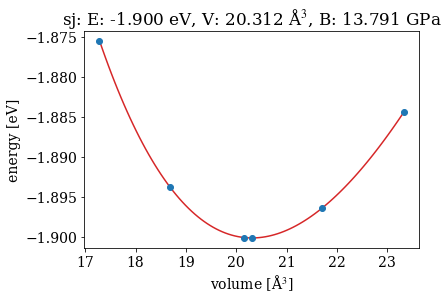

-- fit results are saved in  figs/Li_fcc.su.static_opt.100.png 



(["db['Li_fcc.su.static_opt.100']|Li_fcc.su.static_opt.100|  -1.9002   |3.06, 3.06, 3.06|       7,7,7        |   1, 9,  9   "],
 [])

In [5]:
res('Li_fcc.su', 'ion_relax_opt', list(range(1,6))+[100], show = 'fit', analys_type = 'fit_a')

## Optimize bcc

In [6]:
add('Li_bcc', 'ion_relax_opt', 1, input_st = Li_bcc, it_folder = 'Li/', 
    calc_method = 'uniform_scale', scale_region = (-5, 5), n_scale_images = 5, run = 0)

-- Attention!, cluster None is not found, using default raz 

-- add_loop_scale(): Preparing   scale  calculation ...  

-- File xyz/mp-135_used_for_scaling.xyz was written 

-- Scale_region is (-5, 5) 

-- Scales are [-5.  -2.5  0.   2.5  5. ] 

-- Warning! File ./Li//Li_bcc.su/Li_bcc.su.auto_created_scaled_image.1.geo was replaced 

-- File xyz/Li_bcc.su.1.xyz was written 

-- Warning! File ./Li//Li_bcc.su/Li_bcc.su.auto_created_scaled_image.2.geo was replaced 

-- File xyz/Li_bcc.su.2.xyz was written 

-- Warning! File ./Li//Li_bcc.su/Li_bcc.su.auto_created_scaled_image.3.geo was replaced 

-- File xyz/Li_bcc.su.3.xyz was written 

-- Warning! File ./Li//Li_bcc.su/Li_bcc.su.auto_created_scaled_image.4.geo was replaced 

-- File xyz/Li_bcc.su.4.xyz was written 

-- Warning! File ./Li//Li_bcc.su/Li_bcc.su.auto_created_scaled_image.5.geo was replaced 

-- File xyz/Li_bcc.su.5.xyz was written 

-- 5 scale images have been created. 

--                           |  energy(eV)|    Vector 

'Li_bcc.su'

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li_bcc.su.static_opt.1']  |Li_bcc.su.static_opt.1|  -1.8740   |2.82, 2.82, 2.82|  3040,3040,3040    |   1, 9,  9    
-- db['Li_bcc.su.static_opt.2']  |Li_bcc.su.static_opt.2|  -1.8927   |2.89, 2.89, 2.89|  1362,1362,1362    |   1, 9,  9    
-- db['Li_bcc.su.static_opt.3']  |Li_bcc.su.static_opt.3|  -1.8996   |2.97, 2.97, 2.97|    146,146,146     |   1, 9,  9    
-- db['Li_bcc.su.static_opt.4']  |Li_bcc.su.static_opt.4|  -1.8961   |3.04, 3.04, 3.04|  -790,-790,-790    |   1, 9,  9    
-- db['Li_bcc.su.static_opt.5']  |Li_bcc.su.static_opt.5|  -1.8843   |3.12, 3.12, 3.12| -1490,-1490,-1490  |   1, 9,  9    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-- db['Li_bcc.su.static_opt.100']|Li_bcc.su.static_opt.100|  -1.8997   |2.98, 2.98, 2.98|    -11,-11,-11     |   1, 9,  9    
alpha, energy: 109.47, -1.874
alpha, energy: 109.47, -1.893
alpha, energy: 109.47, -1.900
alpha, energy: 109.47, -1.896
alpha, energy: 109.47, -1.884
alpha, energy: 109.47, -1.900
-- Image saved to  figs/angle.eps 


            v0 = 20.34120593884247 A^3
            a0 = 2.729766913724809 A
            E0 = -1.8996535805517354 eV
            B  = 0.08707447443257675 eV/A^3 



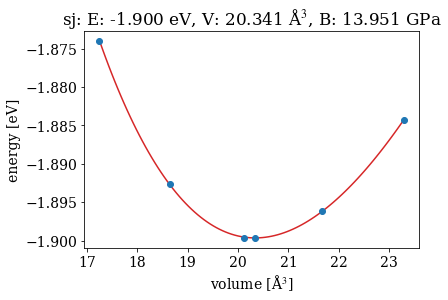

-- fit results are saved in  figs/Li_bcc.su.static_opt.100.png 



(["db['Li_bcc.su.static_opt.100']|Li_bcc.su.static_opt.100|  -1.8997   |2.98, 2.98, 2.98|    -11,-11,-11     |   1, 9,  9   "],
 [])

In [7]:
res('Li_bcc.su', 'ion_relax_opt', list(range(1,6))+[100], show = 'fit', analys_type = 'fit_a')

## BCC vs FCC

In [8]:
e_diff = db['Li_bcc.su.ion_relax_opt.100'].e0-db['Li_fcc.su.ion_relax_opt.100'].e0
e_diff_mev = round(1000*(e_diff),2)
print(f'E(BCC) - E(FCC) = {e_diff_mev} meV')

db['Li.su.ion_relax_opt.100']

E(BCC) - E(FCC) = 0.48 meV


In [10]:
write_database()


Database has been successfully updated

